# PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [139]:
hotels = pd.read_csv('./hotels.csv')
hotels.head(2)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   

                        hotel_name reviewer_nationality  negative_review  \
0               The May Fair Hotel      United Kingdom          Leaving    
1  Mercure London Bloomsbury Hotel      United Kingdom    poor breakfast   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                  3                     1994   
1                                  3                     1361   

       positive_review  review_total_positive_word_counts  \
0   Staff were amazing                                  4   
1             location                                  2   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   
1                                          14             6.3   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   
1  [' Business trip ', ' Couple ', ' Standard Dou...           203 day   

         lat       lng  
0  51.507894 -0.143671  
1  51.521009 -0.123097

In [140]:
hotels_2 = hotels.copy()
hotels_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

# Пропуски. Очистка данных

In [141]:
# Найдем процент наличия пропусков в признаках

hotels_2.isna().mean()*100

hotel_address                                 0.00000
additional_number_of_scoring                  0.00000
review_date                                   0.00000
average_score                                 0.00000
hotel_name                                    0.00000
reviewer_nationality                          0.00000
negative_review                               0.00000
review_total_negative_word_counts             0.00000
total_number_of_reviews                       0.00000
positive_review                               0.00000
review_total_positive_word_counts             0.00000
total_number_of_reviews_reviewer_has_given    0.00000
reviewer_score                                0.00000
tags                                          0.00000
days_since_review                             0.00000
lat                                           0.63288
lng                                           0.63288
dtype: float64

Пропуски обнаружены в двух признаках lat и lang: их количесвто менее одного процента.

In [142]:
# Заменим пропуски на медианное значение признаков

hotels_2.fillna(hotels_2.median(), inplace=True)
hotels_2[['lat', 'lng']].isna().sum()

hotels_2[['lat', 'lng']] = hotels_2[['lat', 'lng']].astype(float)


C:\Users\Питерские котики\AppData\Local\Temp\ipykernel_12956\1746623577.py:3: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [107]:
# Поищем малоинформативные признаки

def check_info_level(df, col_list):
    res_list = []
    
    for col in col_list:
        # Сколько процентов составляет самое высокочастотное значение признака
        top_freq = (df[col].value_counts(True).max()*100).round(2)
        
        # Процент числа уникальный значений в признаке
        nunique_ratio = round(df[col].nunique()/len(df[col])*100, 2)
        
        res_list.append([col, top_freq, nunique_ratio])
        
    return res_list
        

pd.DataFrame(check_info_level(hotels_2, hotels_2.columns), columns=['Признак', 'Процент повторяемости', '% уникальных значений']).set_index('Признак')

Процент повторяемости  \
Признак                                                             
hotel_address                                                0.93   
additional_number_of_scoring                                 0.93   
review_date                                                  0.49   
average_score                                                8.00   
hotel_name                                                   0.93   
reviewer_nationality                                        47.58   
negative_review                                             24.79   
review_total_negative_word_counts                           24.79   
total_number_of_reviews                                      0.93   
positive_review                                              6.95   
review_total_positive_word_counts                            6.95   
total_number_of_reviews_reviewer_has_given                  29.98   
reviewer_score                                              22.44   
tags                                                         1.00   
days_since_review                                            0.49   
lat                                                          1.18   
lng                                                          1.13   

                                            % уникальных значений  
Признак                                                            
hotel_address                                                0.39  
additional_number_of_scoring                                 0.12  
review_date                                                  0.19  
average_score                                                0.01  
hotel_name                                                   0.39  
reviewer_nationality                                         0.06  
negative_review                                             64.33  
review_total_negative_word_counts                            0.10  
total_number_of_reviews                                      0.30  
positive_review                                             80.59  
review_total_positive_word_counts                            0.09  
total_number_of_reviews_reviewer_has_given                   0.05  
reviewer_score                                               0.01  
tags                                                        12.19  
days_since_review                                            0.19  
lat                                                          0.38  
lng                                                          0.38

Показатели не превышает условного порога 95%. Поэтому пока что причины для сокарщения числа признаков нет.

In [143]:
# Проверим, не дублируют ли друг друга поля с названием отеля и его адресом

hotels_2.groupby('hotel_name')[['hotel_address']].nunique().sort_values('hotel_address').value_counts()

hotel_address
1                1491
3                   1
dtype: int64

In [144]:
# Получается, что практически всем отелям соответствует уникальнай адрес. За исключением одного название отеля (Hotel Regina), которое присутствует в разных странах.
# Можно удалить признак hotel_name как дублирующий для hotel_address.

hotels_2.drop(columns='hotel_name', inplace=True)

# Выбросы

In [110]:
hotels_2.describe(include='number')

additional_number_of_scoring  average_score  \
count                 386803.000000  386803.000000   
mean                     498.246536       8.397231   
std                      500.258012       0.547881   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      342.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       review_total_negative_word_counts  total_number_of_reviews  \
count                      386803.000000            386803.000000   
mean                           18.538988              2743.992042   
std                            29.703369              2316.457018   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3613.000000   
max                           408.000000             16670.000000   

       review_total_positive_word_counts  \
count                      386803.000000   
mean                           17.776985   
std                            21.726141   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       total_number_of_reviews_reviewer_has_given  reviewer_score  \
count                                386803.00000   386803.000000   
mean                                      7.17725        8.396906   
std                                      11.05442        1.636090   
min                                       1.00000        2.500000   
25%                                       1.00000        7.500000   
50%                                       3.00000        8.800000   
75%                                       8.00000        9.600000   
max                                     355.00000       10.000000   

                 lat            lng  
count  386803.000000  386803.000000  
mean       49.456537       2.805532  
std         3.459794       4.570019  
min        41.328376      -0.369758  
25%        48.214662      -0.143372  
50%        51.499981      -0.000250  
75%        51.516288       4.831098  
max        52.400181      16.429233

In [111]:
hotels_2.describe(include=['object', 'datetime']).fillna('-')

hotel_address review_date  \
count                                              386803      386803   
unique                                               1493         731   
top     163 Marsh Wall Docklands Tower Hamlets London ...    8/2/2017   
freq                                                 3587        1911   

       reviewer_nationality negative_review positive_review  \
count                386803          386803          386803   
unique                  225          248828          311737   
top         United Kingdom      No Negative     No Positive   
freq                 184033           95907           26885   

                                                     tags days_since_review  
count                                              386803            386803  
unique                                              47135               731  
top     [' Leisure trip ', ' Couple ', ' Double Room '...            1 days  
freq                                                 3853              1911

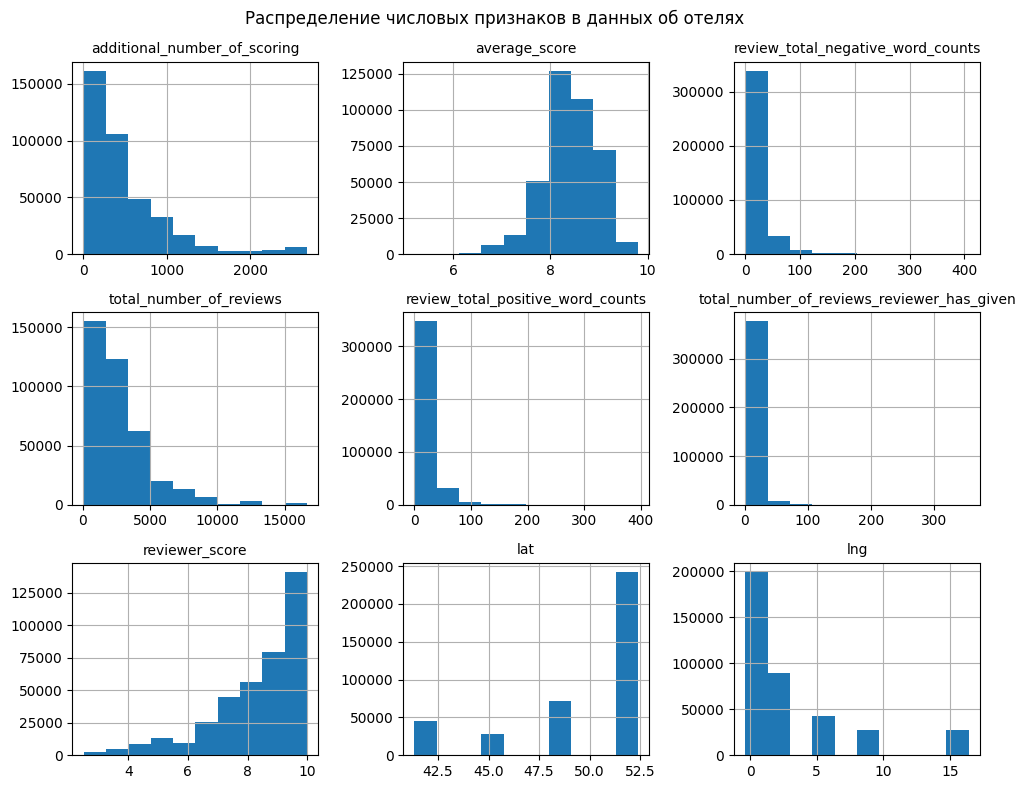

In [146]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10, 8))

hotels_2.select_dtypes(include='number').hist(ax=axes);

for ax in axes.flat: ax.set_title(label= ax.get_title(), fontsize = 10)
plt.suptitle('Распределение числовых признаков в данных об отелях', fontsize=12)
plt.tight_layout()


<img src="images/hists.png" alt="Распределение числовых признаков в данных об отелях">

Рассмотрение основных статистических данных с помощью метода describe, а также визуализация с помощью гистограмм не позволяют обнаружить очевидные выбросы: все признаки находятся в рамках теоретически допустимых пределов.
Попробуем выявить выбросы в дальнейшей работе.

# Работа с признаками

Будем поочередно рассматривать признаки, преобразовывать их, создавать на их основе новые признаки, а также осуществлять отбор.

In [113]:
# Из признака hotel_address извлечем название страны, где располагается отель, и сохраним в новый признак hotel_country. 

hotels_2['hotel_country'] = hotels_2['hotel_address'].apply(lambda x: x.split()[-1]).str.replace('Kingdom', 'United Kingdom')

# Есть логичное предположение, что каждой локации будет соответствовать одни и те же координаты
display(hotels_2.groupby('hotel_country')[['lat', 'lng']].agg(['nunique', 'count']))

# Теперь признаки с координатами выглядят малоинформативными. Попробуем дальше обойтись без них
hotels_2.drop(columns=['lat', 'lng'], inplace=True)

lat             lng        
               nunique   count nunique   count
hotel_country                                 
Austria            148   29178     148   29178
France             456   44830     456   44830
Italy              160   27883     160   27883
Netherlands        105   43006     105   43006
Spain              209   45132     209   45132
United Kingdom     397  196774     397  196774

In [114]:
# Закодируем признак hotel_country двоичным методом и удалим признак hotel_address

import category_encoders as ce
hotels_2 = ce.BinaryEncoder(cols=['hotel_country']).fit_transform(hotels_2)

hotels_2.drop(columns='hotel_address', inplace=True)

hotels_2.head(1)

additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   

  reviewer_nationality negative_review  review_total_negative_word_counts  \
0      United Kingdom         Leaving                                   3   

   total_number_of_reviews      positive_review  \
0                     1994   Staff were amazing   

   review_total_positive_word_counts  \
0                                  4   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   

   hotel_country_0  hotel_country_1  hotel_country_2  
0                0                0                1

In [115]:
# Признак review_date. Используем его, чтобы вычислить количество дней с момента написания отзыва до контрольного дня, в качестве которого возьмем день самого позднего отзыва
# Удалим старый признак

hotels_2['review_date'] = pd.to_datetime(hotels_2['review_date'])

upper_time = hotels_2['review_date'].max()
hotels_2['days_after_review'] = (upper_time - hotels_2['review_date']).dt.days

# Также сохраним отдельно месяц написания отзыва
hotels_2['review_month'] = hotels_2['review_date'].dt.month

hotels_2.drop(columns='review_date', inplace=True)

hotels_2.head(1)

additional_number_of_scoring  average_score reviewer_nationality  \
0                           581            8.4      United Kingdom    

  negative_review  review_total_negative_word_counts  total_number_of_reviews  \
0        Leaving                                   3                     1994   

       positive_review  review_total_positive_word_counts  \
0   Staff were amazing                                  4   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   

   hotel_country_0  hotel_country_1  hotel_country_2  days_after_review  \
0                0                0                1                531   

   review_month  
0             2

In [116]:
# Только что созданный признак days_after_review сильно напоминает признак days_since_review. Сравним их и удалим один из них, если они идентичны

days_diff = hotels_2['days_since_review'].apply(lambda x: int(x.split()[0])) - hotels_2['days_after_review']
print(days_diff.value_counts())

hotels_2.drop(columns='days_since_review', inplace=True)

0    386803
dtype: int64


In [117]:
# Признак reviewer_nationality содержит 225 уникальных значений, закодируем их бинарным методом.

hotels_2 = ce.BinaryEncoder(cols='reviewer_nationality').fit_transform(hotels_2)
hotels_2.head(1)

additional_number_of_scoring  average_score  reviewer_nationality_0  \
0                           581            8.4                       0   

   reviewer_nationality_1  reviewer_nationality_2  reviewer_nationality_3  \
0                       0                       0                       0   

   reviewer_nationality_4  reviewer_nationality_5  reviewer_nationality_6  \
0                       0                       0                       0   

   reviewer_nationality_7  ...      positive_review  \
0                       1  ...   Staff were amazing   

   review_total_positive_word_counts  \
0                                  4   

   total_number_of_reviews_reviewer_has_given reviewer_score  \
0                                           7           10.0   

                                                tags  hotel_country_0  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...                0   

   hotel_country_1 hotel_country_2  days_after_review  review_month  
0                0               1                531             2  

[1 rows x 23 columns]

## Признаки negative_review и positive_review

In [118]:
# Выведем соответствие между негатаивными комментариями и количеством слов в них
print(hotels_2.groupby('negative_review')['review_total_negative_word_counts'].agg('mean').sort_values(ascending=True)[:5], end='\n\n')

# Заметно, что соответствие между истинным числом слов в отзыве и числом в признаке review_total_negative_word_counts неточное
# Разница в негатиных отзывах составляет 1-2 символа.
print('Погрешность в подсчете слов в негативных отзывах:')
print((hotels_2['negative_review'].str.strip().apply(lambda x: len(x.split())) - hotels_2['review_total_negative_word_counts']).value_counts()) 

# Скорректируем это, создав новые уточненные признаки, проделав то же самое с признаком positive_review
hotels_2['negative_review'] = hotels_2['negative_review'].str.strip().str.lower()
hotels_2['positive_review'] = hotels_2['positive_review'].str.strip().str.lower()

hotels_2['review_total_negative_word_counts_new'] = hotels_2['negative_review'].apply(lambda x: len(x.split()))
hotels_2['review_total_positive_word_counts_new'] = hotels_2['positive_review'].apply(lambda x: len(x.split()))

negative_review
No Negative    0.0
 NON           2.0
 NOISE         2.0
 NNN           2.0
 NIL           2.0
Name: review_total_negative_word_counts, dtype: float64

Погрешность в подсчете слов в негативных отзывах:
-2    168299
-1    122597
 2     95907
dtype: int64


In [119]:
# Можно заметить, что среди отзывов есть те, в которых отсутствуют символы, либо те, в которых содержится информации об отсутствии негативной реакции ревьюера, если это
# негативный отзыв, и соответствующе в случае с позитивными.
# Такие отзывы в большинстве случаев начинаются на букву 'n'. Попробуем обнаружить их, возьмем первые 15 по частоте

negative_n = hotels_2[hotels_2['negative_review'] != '']['negative_review'].apply(lambda x: x if x[0] == 'n' else '-').value_counts().index[1:16]

positive_n = hotels_2[hotels_2['positive_review'] != '']['positive_review'].apply(lambda x: x if (x[0] == 'n') and (x[0:4] != 'nice') else '-').value_counts().index[1:16]

print('Негативные комментарии на букву N:')
print(negative_n)

print('Позитивные комментарии на букву N:')
print(positive_n)

# В этих случаях в полях с количеством слов в отзыве оставим ноль
def correct_words_count(row):
    if row['negative_review'] in negative_n: row['review_total_negative_word_counts_new'] = 0
    if row['positive_review'] in positive_n: row['review_total_positive_word_counts_new'] = 0
    return row
    
hotels_2 = hotels_2.apply(correct_words_count, axis=1)

# Проверим выборочно
print('\n\nПроверка:')
hotels_2[hotels_2['negative_review'] == 'nothing all good']['review_total_negative_word_counts_new'].sum()

Негативные комментарии на букву N:
Index(['no negative', 'nothing', 'n a', 'none', 'nothing really',
       'no complaints', 'nothing at all', 'nothing to dislike', 'nil', 'na',
       'nothing to complain about', 'no', 'nothing not to like',
       'nothing all good', 'not much'],
      dtype='object')
Позитивные комментарии на букву N:
Index(['no positive', 'nothing', 'not much', 'not a lot', 'n a',
       'nothing at all', 'nothing special', 'nothing really', 'none', 'no',
       'no thing', 'nothing in particular', 'na', 'no comment',
       'nothing much'],
      dtype='object')


Проверка:


0

Визуализируем следующее предположение: в случае, когда текущая оценка ревьюера ниже средней оценки отеля, количество слов в его негативном отзыве больше, чем в положительном. Соответственная ситуация, когда оценка ревьюера превышает среднюю.

In [120]:
# Добавим признак, содержащий информацию об отклонении каждого значения reviewer_score от average_score соответствующего отеля
hotels_2['score_diff'] = hotels['reviewer_score'] - hotels_2['average_score']
hotels_2['score_diff']

df = hotels_2.loc[:, ['score_diff', 'review_total_positive_word_counts_new', 'review_total_negative_word_counts_new']]

# Создадим функцию, высчитывающую разницу числа слов между комментариями одного ревьюера в зависимости от отклонения его оценки от средней.
def words_diff(row):
    negative_cnt = row['review_total_negative_word_counts_new'] 
    positive_cnt = row['review_total_positive_word_counts_new']
    
    if row['score_diff'] <= 0: res = negative_cnt - positive_cnt
    if row['score_diff'] > 0: res = positive_cnt - negative_cnt
    
    return res


df['words_diff'] = df.apply(words_diff, axis=1)
hotels_2['words_diff'] = df['words_diff']

fig = px.box(
    df, 
    x='words_diff', 
    color=df['score_diff'].apply(lambda x: x/abs(x) if x != 0 else 0).map({1: 'выше', -1: 'ниже', 0: 'равны'}), 
    width=800, 
    height=400,
    title='График разницы числа слов между отзывами в зависимости от <br>оценки рьвьюера'
)

fig.update_layout(
    legend_title='Оценка ревьюера <br>относительно средней:',
    xaxis_title=''   
)

fig.show()

df.drop(df.index, inplace=True)



<img src="images/words_diff.png" alt="График разницы числа слов между отзывами">

На графике можно заметить, что, действительно, отклонение оценки ревьюера от средней оценки отеля может говорить о большей вероятности: 
- превышения числа слов позитивного комментария над числом слов негативного, если оценка выше средней,
- превышения числа слов негативного комментария, если оценка ниже средней,

Когда оценка соответствует средней, разница в числе слов может присутствовать, но вероятность ее отклонения в ту или иную сторону одинкова.

In [121]:
hotels_2.drop(columns=['review_total_negative_word_counts_new', 'review_total_positive_word_counts_new'], inplace=True)

In [122]:
# Преобразуем признак tags в список, убрав лишние символы

hotels_2['tags'] = hotels_2['tags'].str.replace('\'', '').str.replace('[', '').str.replace(']', '').str.split(',')
hotels_2['tags'] = hotels_2['tags'].apply(lambda tag_list: [tag.strip() for tag in tag_list])

# Создадим новый признак, содержащий число тегов в строке
hotels_2['tags_num'] = hotels_2['tags'].apply(len)


# Посчитаем частотность тегов
from collections import defaultdict

def count_tags(tags_col):
    tags_dict = defaultdict(int)
    
    for list_of_tags in tags_col: 
        for tag in list_of_tags: tags_dict[tag] += 1
        
    return (pd.Series(tags_dict).sort_values(ascending=False)/100000).round(2)


tags_freq = count_tags(hotels_2['tags'])

# Создадим еще один признак, который будет содержать среднюю частотность каждой строки тегов (то есть сумму частотностей тегов, деленную на число тегов)
hotels_2['tags_freq'] = hotels_2['tags'].apply(lambda tags_list: (sum([tags_freq[tag] for tag in tags_list])/len(tags_list)).round(2))

# Теперь удалим нечисловой признак
hotels_2.drop(columns='tags', inplace=True)

hotels_2['tags_freq'][:10]


C:\Users\Питерские котики\AppData\Local\Temp\ipykernel_12956\4007491277.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



0    1.67
1    1.05
2    1.40
3    1.35
4    0.68
5    1.05
6    1.76
7    1.41
8    1.68
9    1.76
Name: tags_freq, dtype: float64

In [123]:
# Удалим оставшиеся нечисловые признаки negative_review и positive_review

hotels_2.drop(columns=['negative_review', 'positive_review'], inplace=True)

# Шкалирование

In [124]:
# Вынесем названия всех признаков за ичключенем бинарных в отдельный список short_cols
cols = pd.Series(hotels_2.columns)
short_cols = list(cols.drop(index=list(range(1, 9))+list(range(14, 17))))
short_cols

['additional_number_of_scoring',
 'reviewer_nationality_7',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'hotel_country_2',
 'days_after_review',
 'review_month',
 'score_diff',
 'words_diff',
 'tags_num',
 'tags_freq']

In [125]:
# В связи с тем, что среди признаков едва ли есть те, которые распределены нормально, для нормализации будем использовать метод RobustScaler
from sklearn import preprocessing

r_scaler = preprocessing.RobustScaler().fit_transform(hotels_2[short_cols])
r_scaler_df = pd.DataFrame(r_scaler, columns=short_cols)

# Для дополнительного масштабирования попробуем стандартизовать данные с помощью метода StandardScaler
s_scaler = preprocessing.StandardScaler().fit_transform(r_scaler_df)
s_scaler_df = pd.DataFrame(s_scaler, columns=short_cols)

s_scaler_df.head(1)

additional_number_of_scoring  reviewer_nationality_7  \
0                      0.165422                0.643924   

   review_total_negative_word_counts  total_number_of_reviews  \
0                           -0.52314                -0.323767   

   review_total_positive_word_counts  \
0                          -0.634121   

   total_number_of_reviews_reviewer_has_given  hotel_country_2  \
0                                   -0.016034         0.661932   

   days_after_review  review_month  score_diff  words_diff  tags_num  \
0           0.845135     -1.339593    1.049637   -0.325097  0.827499   

   tags_freq  
0   0.916109

<AxesSubplot: title={'center': 'Распределения после шкалирования методами RobustScaler и StandardScaler'}, ylabel='Density'>

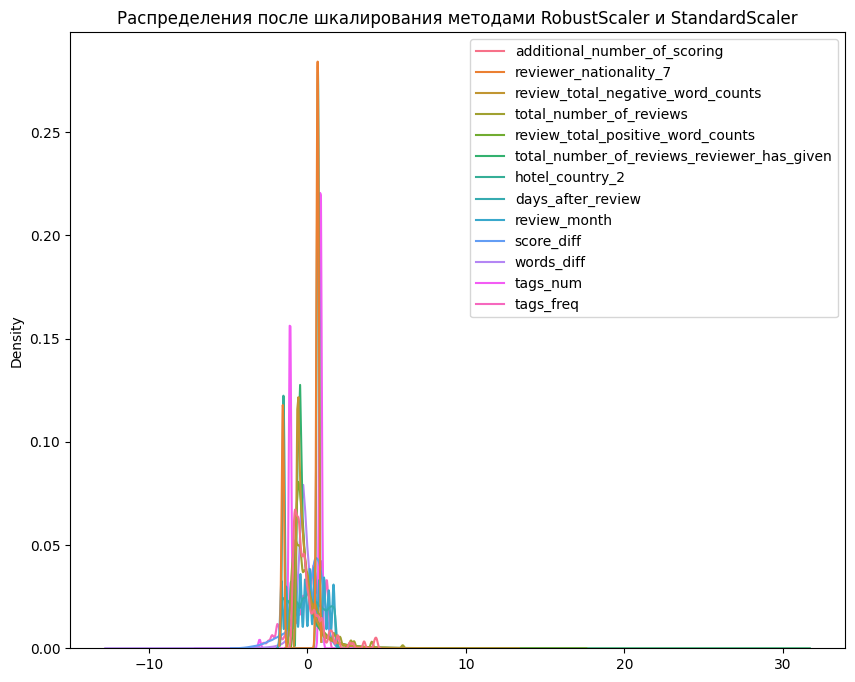

In [126]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после шкалирования методами RobustScaler и StandardScaler')
sns.kdeplot(s_scaler_df, ax=ax1)

<img src="images/scaling.png" alt="График распределения после шкалирования">

# Корреляционный анализ

In [127]:
# Сейчас распределение признаков данных приведены к нормальному, поэтому воспользуемся методом Пирсона для расчета корреляции
corr_df = hotels_2[short_cols].corr()
corr_df.head()

additional_number_of_scoring  \
additional_number_of_scoring                           1.000000   
reviewer_nationality_7                                 0.148313   
review_total_negative_word_counts                      0.029536   
total_number_of_reviews                                0.824467   
review_total_positive_word_counts                     -0.052254   

                                   reviewer_nationality_7  \
additional_number_of_scoring                     0.148313   
reviewer_nationality_7                           1.000000   
review_total_negative_word_counts                0.009847   
total_number_of_reviews                          0.057732   
review_total_positive_word_counts               -0.022795   

                                   review_total_negative_word_counts  \
additional_number_of_scoring                                0.029536   
reviewer_nationality_7                                      0.009847   
review_total_negative_word_counts                           1.000000   
total_number_of_reviews                                     0.035233   
review_total_positive_word_counts                           0.119284   

                                   total_number_of_reviews  \
additional_number_of_scoring                      0.824467   
reviewer_nationality_7                            0.057732   
review_total_negative_word_counts                 0.035233   
total_number_of_reviews                           1.000000   
review_total_positive_word_counts                -0.029557   

                                   review_total_positive_word_counts  \
additional_number_of_scoring                               -0.052254   
reviewer_nationality_7                                     -0.022795   
review_total_negative_word_counts                           0.119284   
total_number_of_reviews                                    -0.029557   
review_total_positive_word_counts                           1.000000   

                                   total_number_of_reviews_reviewer_has_given  \
additional_number_of_scoring                                        -0.072207   
reviewer_nationality_7                                              -0.090435   
review_total_negative_word_counts                                    0.001804   
total_number_of_reviews                                             -0.025708   
review_total_positive_word_counts                                    0.026604   

                                   hotel_country_2  days_after_review  \
additional_number_of_scoring              0.378265           0.012766   
reviewer_nationality_7                    0.174660           0.000545   
review_total_negative_word_counts         0.023937          -0.042077   
total_number_of_reviews                   0.157250           0.007827   
review_total_positive_word_counts        -0.037918          -0.045617   

                                   review_month  score_diff  words_diff  \
additional_number_of_scoring          -0.013643   -0.011360   -0.007573   
reviewer_nationality_7                -0.044371    0.023216   -0.008569   
review_total_negative_word_counts     -0.009451   -0.370771    0.485830   
total_number_of_reviews               -0.005048   -0.013994   -0.001814   
review_total_positive_word_counts     -0.026909    0.198120    0.278117   

                                   tags_num  tags_freq  
additional_number_of_scoring       0.036342   0.057023  
reviewer_nationality_7             0.034788   0.124547  
review_total_negative_word_counts -0.079573  -0.044706  
total_number_of_reviews            0.014284   0.018377  
review_total_positive_word_counts -0.095936   0.011285

In [128]:
# Для удобства рассмотрения матрицы корреляции напишем функцию для обнаружения признаков с сильной корреляцией (коэфф.не ниже 0.7)
# Далее удалим признаки, чтобы избавиться от мультиколлинеарности

def check_corr(corr_df):
    for num_c, col in enumerate(list(corr_df.columns)):
        for ind in list(corr_df.index)[num_c+1:]:
            if corr_df.loc[ind, col] >= 0.7: print(f'{ind}, {col}: {corr_df.loc[ind, col]}')
            
check_corr(corr_df)

hotels_2.drop(columns=['additional_number_of_scoring', 'score_diff'], inplace=True)

total_number_of_reviews, additional_number_of_scoring: 0.8244671077888037


# Разделение набора данных для обучения и тестирования

In [129]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels_2.drop(['reviewer_score'], axis = 1)  
y = hotels_2['reviewer_score']

from sklearn.model_selection import train_test_split
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Оценка значимости признаков

In [130]:
print(str(short_cols))

# Разделим признаки из списка short_cols по типу.
# Числовые признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'days_after_review', 'words_diff', 'tags_num', 'tags_freq']

# Категориальные признаки
cat_cols = ['average_score', 'review_month']

# Далее построим диаграммы значимости признаков в зависимости от их типов

['additional_number_of_scoring', 'reviewer_nationality_7', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'hotel_country_2', 'days_after_review', 'review_month', 'score_diff', 'words_diff', 'tags_num', 'tags_freq']


<AxesSubplot: >

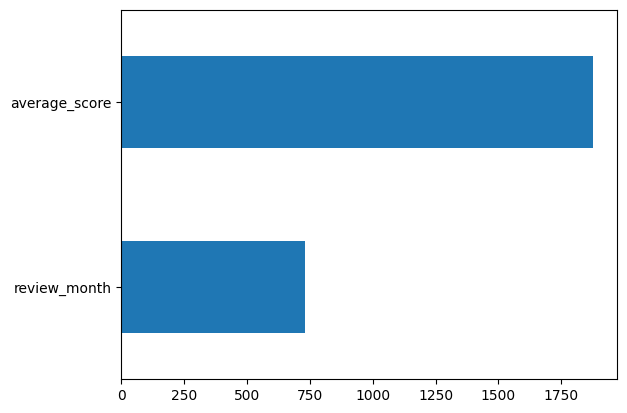

In [131]:
from sklearn.feature_selection import chi2 # хи-квадрат

y = y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<img src="images/cat_cols.png" alt="Диаграмма значимости категориальных признаков">

<AxesSubplot: >

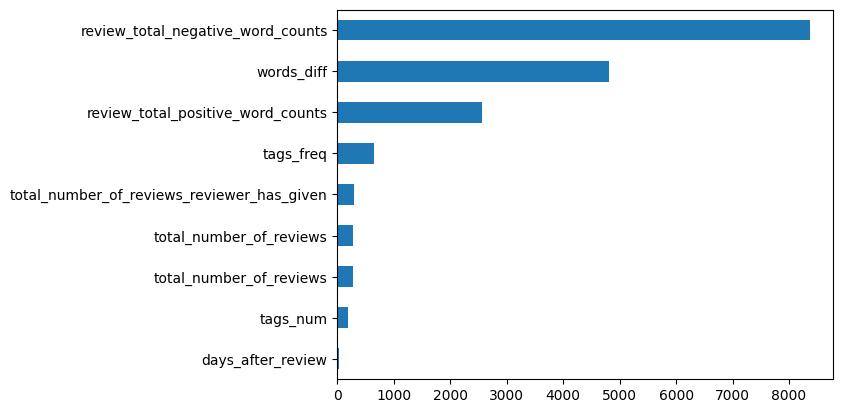

In [132]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<img src="images/num_cols.png" alt="Диаграмма значимости числовых признаков">

In [133]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [134]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.09242684791833927
